<a href="https://colab.research.google.com/github/shicong621/Colab/blob/main/%E2%80%9CCS505_PA3_student%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this piece of code, we are going to process and analyze the data we collect from Twitter, Wikipedia, ABC and Fox news.

Prior to this assignment, please make sure you have implemented the scraping functions so that you could scrap data from the Wikipedia, ABC and Fox news pages.



Task 1. With your implemented code provided in the first lab section, get the "article" texts of the wikipedia page of "fishing" and its all linked wiki pages. Your saved data should contain the titles of the wiki pages and their article texts.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import csv
csv.field_size_limit(sys.maxsize)

# Here is a function you could load the text data if your saved data follows
# the format we provide the in first lab section code.

def loadWikiTexts(csvPath):
  wikiRawTextDict = {}
  with open(csvPath, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      wikiRawTextDict[row['wikiTitle']] = row['wikiContents']
  return wikiRawTextDict

# Load your wiki text data here

In [ ]:
csvPathFish = "/content/drive/MyDrive/Colab Notebooks/wikiContents.csv"
rawWikiDictFish = loadWikiTexts(csvPathFish)

Task 2. With library Spacy and Regular Expression (re), preprocess our scraped data to:

- Remove all the references texts [...] in the scraped data  ([re](https://docs.python.org/3/library/re.html)). 
- [Sentence split](https://spacy.io/usage/linguistic-features#sbd) (Spacy).
- [Tokenize](https://spacy.io/usage/linguistic-features#tokenization) (Spacy)
- [Lemmatize](https://spacy.io/usage/linguistic-features#lemmatization) (Spacy)
- [Lower case](https://www.programiz.com/python-programming/methods/string/lower) (String)


In [ ]:
# install spacy and related package(s)

!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 8.4 MB/s 
     |████████████████████████████████| 1.2 MB 53.8 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
numba 0.56.2 requires setuptools<60, but you have setuptools 65.4.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-10-05 23:11:08.522966: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 16.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer  
import string
import spacy
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
  # Input: a wiki text dictionary with keys are titles and values are the corresponding texts.
  # Output: a wiki text dictionary with keys are the titles and the values are the preprocessed texts 
  # (sentences - tokens).

  # sub-task 1: remove all the references texts "[...]"
  # sub-task 2: segment all the sentences in the wiki texts.
  # sub-task 3: tokenize the sentences from sub-task 2.
  # sub-task 4: lemmatize the tokens from sub-task 3.
  # sub-task 5: lower-case the tokens from sub-task 3/4.
  lemmatizer = WordNetLemmatizer()  
  stopwords_english = nlp.Defaults.stop_words
  text = re.sub(r'\[\d*\]', ' ', text)
  text = re.sub(r'‡', '', text)
  sentences = nltk.sent_tokenize(text)
  res = []
  for sentence in sentences: #Sentence split
      text_tokens = nltk.word_tokenize(sentence) # tokenize
      text_clean = []
      for word in text_tokens:
          word = word.lower() # lowercases
          if word not in stopwords_english and word not in string.punctuation: # remove stopwords, remove punctuation
              if len(word) > 1 and re.search('[a-zA-Z]',word):
                  lem_word = lemmatizer.lemmatize(word) # lemmatize
                  text_clean.append(lem_word)
      if len(text_clean)>0:
          res.append(text_clean)
  return res


Task 3. Construct a dictionary of the vocabulary for your scraped data (all texts). The keys are the word types and the values are the count of the appearances of the word (frequency).

In [ ]:
def computeFreq(wikiTextDict):

  # Input: a wiki text dictionary with keys are titles and values are the preprocessed corresponding texts.
  # Output: a dictionary with keys are the word types, and the values are the appearance counts of the word types
  wiki_sentences = []
  for texts in wikiTextDict:
    sents = preprocess(texts)
    wiki_sentences.extend(sents)
  print("Number wiki sentences: {}".format(len(wiki_sentences)))
  
  wiki_words = []
  for sent in wiki_sentences:
    wiki_words.extend(sent)
  print("Number wiki words: {}".format(len(wiki_words)))
  return wiki_words
  # Compute the frequency dictionary here.


In [ ]:
wikiWords = computeFreq(rawWikiDictFish)

Number wiki sentences: 505
Number wiki words: 1541


Task 4. What are the top 20 non-stop, non-punctuation words in the vocabulary according to frequency?

In [ ]:
import collections
from collections import Counter

In [ ]:
def computeTop20Words(freqDict):
  wiki_vocab = Counter(freqDict)
  print("Wiki vocab size: {}".format(len(wiki_vocab)))
  return wiki_vocab.most_common(20)
  
  # Input: a dictionary with keys are the word types, and the values are the appearance counts of the word types
  # Output: a list of 20 words that appear most frequently in all the preprocessed scraped texts.

  # If not preprocessed specifically, the punctuations still exist in the frequency dictionary from task 3.
  # You need to remove them before outputing the top 20 words.
  

# Print your top 20 words here.

In [ ]:
computeTop20Words(wikiWords)

Wiki vocab size: 691


[('wikipedia', 471),
 ('fishing', 63),
 ('category', 28),
 ('fish', 25),
 ('article', 15),
 ('water', 14),
 ('fishery', 14),
 ('sport', 11),
 ('link', 10),
 ('boat', 9),
 ('identifier', 9),
 ('pesca', 9),
 ('free', 7),
 ('page', 6),
 ('aquaculture', 5),
 ('united', 5),
 ('world', 5),
 ('change', 5),
 ('content', 5),
 ('help', 5)]

Task 5. Use library such as wordcloud, [generate the word cloud](https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5) of the text to visualize the distribution of non-stop and non-punctuation words.

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def make_wordcloud(text, picture_name):
    wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    wordcloud.to_file(picture_name)

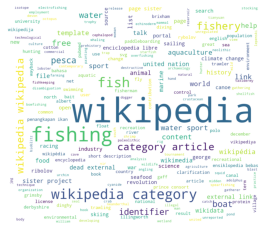

In [ ]:
make_wordcloud(" ".join(wikiWords), 'wikipedia_covid.png')

Task 6. Preprocess the raw scraped tweets with keyword ’fishing’ you’ve collected in the last assignment in the same way as you preprocess the wiki texts.

In [ ]:
# Here is a function you could load the tweet text data if your saved data follows
# the format we provide the in last lab section code.

import csv

def loadTweetTextFromCSV(csvPath):
  tweetDict = {}
  with open(csvPath, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      tweetDict[int(row['idx'])] = row['tweetText']
  return tweetDict

csvPathFish = "/content/drive/MyDrive/Colab Notebooks/tweets_fishing.csv"
rawTweetDictFish = loadTweetTextFromCSV(csvPathFish)
# processedTweetData = preprocess(tweetDict) # here we assume you have implemented the preprocess function in task 2.


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tweetsFishing = list(rawTweetDictFish.values())

In [ ]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    lemmatizer = WordNetLemmatizer()  
    stopwords_english = nlp.Defaults.stop_words
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove emoji
    tweet = re.sub(r'[\U00010000-\U0010ffff]', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        # remove stopwords, remove punctuation
        if word not in stopwords_english and word not in string.punctuation:
            if len(word) > 1 and re.search('[a-zA-Z]',word):
                lem_word = lemmatizer.lemmatize(word) 
                tweets_clean.append(lem_word)

    return tweets_clean

In [ ]:
tweets_new = []
for tweet in tweetsFishing:
    tweet_clean = process_tweet(tweet)
    tweets_new.extend(tweet_clean)

In [ ]:
print("twitter test set token size: {}".format(len(tweets_new)))

twitter test set token size: 15336575


In [ ]:
twitter_vocab = Counter(tweets_new)
print("twitter test set vocab size: {}".format(len(twitter_vocab)))

twitter test set vocab size: 17929


In [ ]:
wiki_vocab = Counter(wikiWords)
print("wikipedia test set vocab size: {}".format(len(wiki_vocab)))

wikipedia test set vocab size: 691


Task 7. Compute how many **word types** in your tweets are out-of-vocabulary (out of Wiki vocabulary Dict), divided by the number of **word types** in your tweets. Show the value in percentage (%).

In [ ]:
def computeOOVWordTypes(tweetVocabDict, wikiVocabDict):

  # Input: a dictionary of tweet data vocabulary, a dictionary of wiki data vocabulary.
  # Output: the ratio of word types in your tweets that are out-of-vocabulary w.r.t. wiki vocabulary
  # v.s. total number of word types in your tweet data.

  # The ratio should be in percentage.
  num_oov_type = 0
  for word in tweetVocabDict:
    if word not in wikiVocabDict:
        num_oov_type += 1
  print("Word type OOV-rate: {}".format(num_oov_type/len(tweetVocabDict)))

# Print your ratio here.

In [ ]:
computeOOVWordTypes(twitter_vocab, wiki_vocab)

Word type OOV-rate: 0.9786937364047075


Task 8. Compute how many **word tokens** in your tweets are out of vocabulary, divided by the number of **word tokens** in your tweets. (This is the OOV-rate of your tweet test set.)

In [ ]:
def computeOOVWordTokens(tweetVocabDict, wikiVocabDict):

  # Input: a dictionary of tweet data vocabulary, a dictionary of wiki data vocabulary. (E.g. computed from task 3)
  # Output: the ratio of word tokens in your tweets that are out-of-vocabulary w.r.t. wiki vocabulary
  # v.s. total number of word tokens in your tweet data.

  # Remeber this time we count the number of tokens instead of types. The ratio should be in percentage.
  
  num_oov_token = 0
  for word in tweetVocabDict:
    if word not in wiki_vocab:
        num_oov_token += 1
  print("Word token OOV-rate: {}".format(num_oov_token/len(tweetVocabDict)))

# Print your ratio here.

In [ ]:
computeOOVWordTokens(tweets_new, wiki_vocab)

Word token OOV-rate: 0.8084141993893682


Task 9. Get the first 9,000 sentences from the processed Wikipedia data from task 2, train a trigram Add-one-smoothing language model based
on these 9,000 sentences (which you should have done so in the last assignment). 

(You could consider using the language model from NLTK.)


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def process_wiki_for_LM(text):
    lemmatizer = WordNetLemmatizer()  
    stopwords_english = nlp.Defaults.stop_words
    text = re.sub(r'\[\d*\]', ' ', text)
    text = re.sub(r'‡', '', text)
    sentences = nltk.sent_tokenize(text)
    res = []
    for sentence in sentences:
        sentence = sentence.lower()
        text_tokens = nltk.word_tokenize(sentence) # tokenize
        if len(text_tokens)>0:
            res.append(text_tokens)

    return res

In [ ]:
wiki_train_sentences = []
for text in rawWikiDictFish:
    sents = process_wiki_for_LM(text)
    wiki_train_sentences.extend(sents)
    if len(wiki_train_sentences) >= 9000:
        break
print("Number of wiki train sentences: {}".format(len(wiki_train_sentences)))

Number of wiki train sentences: 533


In [ ]:
# import nltk
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm.models import Laplace
def traim_lm_model(N_GRAM, train_sentences):
    train_data, padded_sents = padded_everygram_pipeline(N_GRAM, train_sentences)
    model = Laplace(N_GRAM) # Lets train a n-grams model, previously we set n=1,2,3
    model.fit(train_data, padded_sents)
    print("Ngram model: {}".format(model.vocab))
    return model
 
# Get the first 9000 sentences from the processed wiki data.

# Train the language model with the processed data.

In [ ]:
TRI_GRM = 3
tri_model_wiki = traim_lm_model(TRI_GRM, wiki_train_sentences)

Ngram model: <Vocabulary with cutoff=1 unk_label='<UNK>' and 827 items>


Task 10. Report the average perplexity of this Wikipedia-trained language model on your processed Twitter test sentences (i.e. the 20% split) related to "fishing". Compare this perplexity to the one you obtained in task 4 of the last assignment, specifically, the trigram LM trained on tweets. 

In [ ]:
from sklearn.model_selection import train_test_split
training, testing = train_test_split(list(rawTweetDictFish.values()),train_size = 0.8)
print('Tweets train senteces number: {}'.format(len(training)))
print('Tweets test senteces number: {}'.format(len(testing)))

Tweets train senteces number: 7864
Tweets test senteces number: 1967


In [ ]:
twitter_test_sentences = []
for text in testing:
    sents = process_tweet(text)
    twitter_test_sentences.extend(sents)

In [ ]:
import numpy as np
def test_lm_model(model, N_GRAM, test_sentences):
    test_data, padded_sents_test = padded_everygram_pipeline(N_GRAM, test_sentences)
    ngram_perplex = []
    n = 0
    for ngramlize_sent in test_data:
        ngram_list = list(ngramlize_sent)
        ngram_sent = []
        for ngram in ngram_list:
            if len(ngram) == N_GRAM:
                ngram_sent.append(ngram)
        ngram_perplex.append(model.perplexity(ngram_sent))
#         n += 1
#         if n % 200 == 0:
#             print("Processing: {}".format(n))
    perplex = np.mean(ngram_perplex)
    return perplex
  
  # Input: your model; the testing data

  # Output: average perplexity of the model on your testing data.

  # You may want to re-use the same function you implemented in the last assignment

  

# Prepare the testing data

# Compute and print the average perplexity of the wiki-trained model on your tweet testing data.

In [ ]:
tri_perplex_wiki = test_lm_model(tri_model_wiki, TRI_GRM, twitter_test_sentences)

In [ ]:
print("Trigram perplex for wiki: {}".format(tri_perplex_wiki))

Trigram perplex for wiki: 887.0643169805215


Task 11. Scrap 100 news from both ABC news and Fox news (100 each) with the code provided in the first lab section. Preprocess the texts in the same way as task 2.

In [ ]:
# Here is a function you could load the text data if your saved data follows
# the format we provide the in first lab section code.
import csv
def loadNewsTexts(csvPath):

  # the function returns two dictionaries, one for ABC news text data and one for Fox news text data

  abcNewsRawTextDict = {}
  foxNewsRawTextDict = {}
  with open(csvPath, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      if (row['newsSource'] == "ABCNews"):
        abcNewsRawTextDict[row['newsTitle']] = row['newsContents']
      else:
        foxNewsRawTextDict[row['newsTitle']] = row['newsContents']

  return abcNewsRawTextDict,foxNewsRawTextDict

# Load your news text data here
# abcNewsDict,foxNewsDict = loadNewsTexts('./newsContents.csv')


In [ ]:
csvPathNews = "/content/drive/MyDrive/Colab Notebooks/newsContents.csv"
abcNewsRawTextDict,foxNewsRawTextDict = loadNewsTexts(csvPathNews)

In [ ]:
abcNew = list(abcNewsRawTextDict.values())
foxNews = list(foxNewsRawTextDict.values())

In [ ]:
def process_news_data(text):
    lemmatizer = WordNetLemmatizer()  
    stopwords_english = nlp.Defaults.stop_words
    text = re.sub(r'close Video ', ' ', text)
    sentences = nltk.sent_tokenize(text)
    res = []
    for sentence in sentences: #Sentence split
        text_tokens = nltk.word_tokenize(sentence) # tokenize
        text_clean = []
        for word in text_tokens:
            word = word.lower() # lowercases
            word = re.sub(r'\'', '', word)
            if word not in stopwords_english and word not in string.punctuation: # remove stopwords, remove punctuation
                if len(word) > 1 and re.search('[a-zA-Z]',word):
                    lem_word = lemmatizer.lemmatize(word) # lemmatize
                    text_clean.append(lem_word)
        if len(text_clean)>0:
            res.append(text_clean)

    return res

In [ ]:
import operator
fox_sentences = []
fox_words = []
for text in foxNews:
    fox_sentences.extend(process_news_data(text))
    for sent in fox_sentences:
      fox_words.extend(sent)
print("Number of Fox news sentences: {}".format(len(fox_sentences)))
print("Number Fox news words: {}".format(len(fox_words)))
fox_vocab = Counter(fox_words)
sorted_fox = dict(sorted(fox_vocab.items(), key=operator.itemgetter(1),reverse=True))

Number of Fox news sentences: 2229
Number Fox news words: 1365071


In [ ]:
abc_sentences = []
abc_words = []
for text in abcNew:
    abc_sentences.extend(process_news_data(text))
    for sent in abc_sentences:
      abc_words.extend(sent)
print("Number of ABC news sentences: {}".format(len(abc_sentences)))
print("Number Fox news words: {}".format(len(abc_words)))
abc_vocab = Counter(abc_words)
sorted_abc = dict(sorted(abc_vocab.items(), key=operator.itemgetter(1),reverse=True))

Number of ABC news sentences: 1934
Number Fox news words: 632287


Task 12. Construct a histogram of word count from both sources. The X-axis should be unique words in decending order of word count and the Y-axis should be the counts for each word.

(Please remember to preprocess the text data first.)

In [ ]:
import matplotlib.pyplot as plt

def plotHistogram(myDictionary, news_name):
  x = range(1,len(myDictionary)+1)
  index = []
  for i in x:
    index.append(i)
  plt.bar(index, myDictionary.values())
  title_name = "{} news type-word token graph".format(news_name)
  plt.title(title_name) 
  plt.xlabel("Word Type Index") 
  plt.ylabel("Count") 
  plt.savefig("{}.png".format(title_name))
  plt.show()

  # Input: a list of word types, a list of word token counts to the corresponding word types
  # Output: (display the histogram of word count from a news source)

  # X-axis should be (indexes) of the word type, and Y-axis should be the word counts of the word type.
  

# Preprocess the news data.

# Compute word type list and the word token list.

# Plot the histogram here.

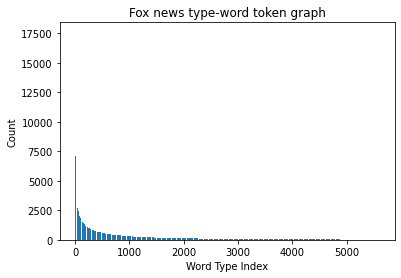

In [ ]:
plotHistogram(sorted_fox, 'Fox')

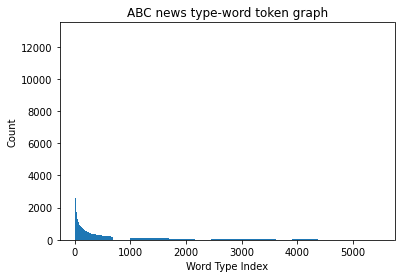

In [ ]:
plotHistogram(sorted_abc, 'ABC')

Task 13. Construct the word clouds from the two texts. Include the word clouds and comment your interesting insights after that.

In [ ]:
abc_words = []
for sent in abc_sentences:
    for word in sent:
        if (word!='pm' and word!='nt'):
            abc_words.append(word)

In [ ]:
fox_words = []
for sent in fox_sentences:
    for word in sent:
        fox_words.append(word)

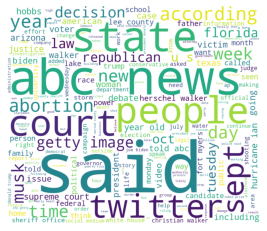

In [ ]:
make_wordcloud(" ".join(abc_words), 'abc_news.png')

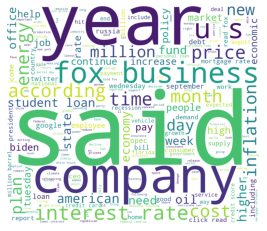

In [ ]:
make_wordcloud(" ".join(fox_words), 'fox_news.png')